<img src="res/PP_logotyp_ANG_CMYK.svg" width="90%" />

### Table of Contents

1. [Executive summary](#Executive-summary)
2. [Foreword](#Foreword)
3. [Setting up](#Setting-up)
    1. [Tools](#Tools)
    2. [Datasets](#Datasets)
    3. [Individual stocks descriptions](#Individual-stocks-descriptions)
        1. [AAPL](#AAPL)
        2. [GOOG](#GOOG)
        3. [MSFT](#MSFT)
        4. [AMZN](#AMZN)
4. [Analysis](#Analysis)
    1. [Pair trading similarity](#Pair-trading-similarity)
    2. [Daily stocks exchange](#Daily-stocks-exchange)
    3. [Moving average](#Moving-average)
    4. [Daily average return](#Daily-average-return)
    5. [Correlation](#Correlation)
        1. [Pairplot](#Pairplot)
        2. [Return on risk factor](#Return-on-risk-factor)
    6. [Risk](#Risk)
5. [Summary](#Summary)

# Executive summary



--||--. The analysis result is, for the interval '2021-04-30' - '2022-04-30', out of `AAPL`, `GOOG`, `MSFT` and `AMZN`:
- AAPL (Apple) was the best choice, given a risk factor of based on return
- pairs Apple-Microsoft, can be considered for pair trading

# Foreword

The following report is an analysis of the top tech stocks from the US market. It concerns deciding the best stock for
an investment, based on given risk factor. Let us try to dig in why we need such type of analysis.

Everything starts with investment and its return with some safety and security. Since there is a lot of stocks to choose
from and every investor has their own needs when it comes to the measure of *subjectively* best stock. That is why it is
really important to filter the stocks on some parameters when formulating personal stock portfolio.

As an example, we will analyze stocks of top 4 US tech companies to see  which stock is more suitable for a portfolio
based on risk factor.

# Setting up

## Tools

For data processing and visualization, we are going to use python with the following tools:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from pandas_datareader.data import DataReader
from datetime import datetime

## Datasets

The datasets we are using are imported from Yahoo reader. The 4 stocks will be
- `AAPL` - Apple
- `GOOG` - Google
- `MSFT` - Microsoft
- `AMZN` - Amazon

In [12]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']


end = '2022-04-30'
start = '2021-04-30'

for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

# display data characteristics
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2022-04-18,3080.790039,3005.010010,3030.469971,3055.699951,2325700.0,3055.699951,AMAZON
2022-04-19,3172.979980,3031.010010,3040.590088,3162.310059,2746300.0,3162.310059,AMAZON
2022-04-20,3152.050049,3072.070068,3152.050049,3079.959961,2981500.0,3079.959961,AMAZON
2022-04-21,3134.760010,2951.790039,3094.280029,2965.919922,3198500.0,2965.919922,AMAZON
2022-04-22,2992.300049,2873.949951,2965.000000,2887.000000,3649800.0,2887.000000,AMAZON
2022-04-25,2924.429932,2846.129883,2880.459961,2921.479980,3093700.0,2921.479980,AMAZON
2022-04-26,2897.120117,2778.590088,2896.000000,2787.820068,3876500.0,2787.820068,AMAZON
2022-04-27,2838.969971,2715.669922,2803.830078,2763.340088,3566800.0,2763.340088,AMAZON
2022-04-28,2918.750000,2806.000000,2843.560059,2891.929932,5865800.0,2891.929932,AMAZON


A single entry (timestamp) concerning a given stock contains 6 attributes:
- High - the highest value reached in an interval from timestamp till the next one
- Low - the lowest value reached in the interval
- Open - value at the start of the interval
- Close - value at the end of the interval
- Volume - total volume traded during the interval
- Adj Close - adjusted close - closing price after adjustments for all applicable splits and dividend distributions

Besides the actual data, the whole dataset contains an additional attribute `company_name`, the sole purpose of which is
to determine which stock a given set of values belongs.

## Individual stocks descriptions:

### APPL

In [4]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,155.034981,151.771857,153.303281,153.460198,8.660767e+07,153.149027
std,16.184502,15.415521,15.844012,15.809064,2.541833e+07,15.981827
min,124.639999,122.250000,123.160004,122.769997,4.100000e+07,122.251923
25%,144.889999,142.660004,143.750000,144.500000,6.902390e+07,143.890228
50%,151.880005,149.429993,150.369995,150.809998,8.153200e+07,150.618103
75%,169.679993,165.500000,167.479996,166.559998,9.867070e+07,166.559998
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.778397


### GOOG

In [5]:
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,2738.760116,2685.098480,2713.743624,2711.416608,1.264933e+06,2711.416608
std,185.121271,183.923865,185.800675,184.636467,5.166724e+05,184.636467
min,2276.601074,2230.050049,2261.090088,2239.080078,5.933000e+05,2239.080078
25%,2618.074951,2550.070068,2596.669922,2584.800049,9.312000e+05,2584.800049
50%,2767.989990,2714.000000,2742.194092,2740.090088,1.146400e+06,2740.090088
75%,2885.959961,2834.699951,2864.020020,2856.060059,1.433900e+06,2856.060059
max,3042.000000,2997.750000,3037.270020,3014.179932,4.487500e+06,3014.179932


### MSFT

In [6]:
MSFT.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,298.078142,292.195968,295.335731,295.248656,2.829885e+07,294.291941
std,26.253456,25.618987,26.073126,25.989270,1.086874e+07,26.232881
min,243.229996,238.070007,239.309998,239.000000,1.390020e+07,237.068985
25%,286.170013,278.410004,282.000000,280.750000,2.130740e+07,280.070007
50%,298.720001,293.489990,296.220001,296.029999,2.618680e+07,295.419159
75%,312.380005,306.459991,309.630005,310.200012,3.272000e+07,309.552429
max,349.670013,342.200012,344.619995,343.109985,9.042890e+07,342.402008


### AMZN

In [7]:
AMZN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,3339.066914,3260.688897,3302.563603,3298.277635,3.468452e+06,3298.277635
std,209.726353,223.666198,213.848320,218.975319,1.535864e+06,218.975319
min,2615.219971,2432.500000,2596.979980,2485.629883,1.680300e+06,2485.629883
25%,3233.000000,3172.199951,3195.000000,3198.010010,2.569000e+06,3198.010010
50%,3352.320068,3289.070068,3328.899902,3315.959961,3.140300e+06,3315.959961
75%,3482.000000,3409.419922,3451.639893,3446.570068,3.845900e+06,3446.570068
max,3773.080078,3696.790039,3744.000000,3731.409912,1.361650e+07,3731.409912


# Analysis

## Pair trading similarity

Changes in some stocks tend to follow each other. For example, it may be the case AMD's stock value follows very closely
that of Nvidia's, with a delay of roughly 2 minutes.

When that is the case, it is worth considering doing pair trading. When one is sure the above holds true and knows the
delay, instead of using resources on analyzing both stocks, it suffices to analyze one and use the same analysis for the
other.

We can find stocks suitable for pair trading by comparing their plots of `Adj Close`.

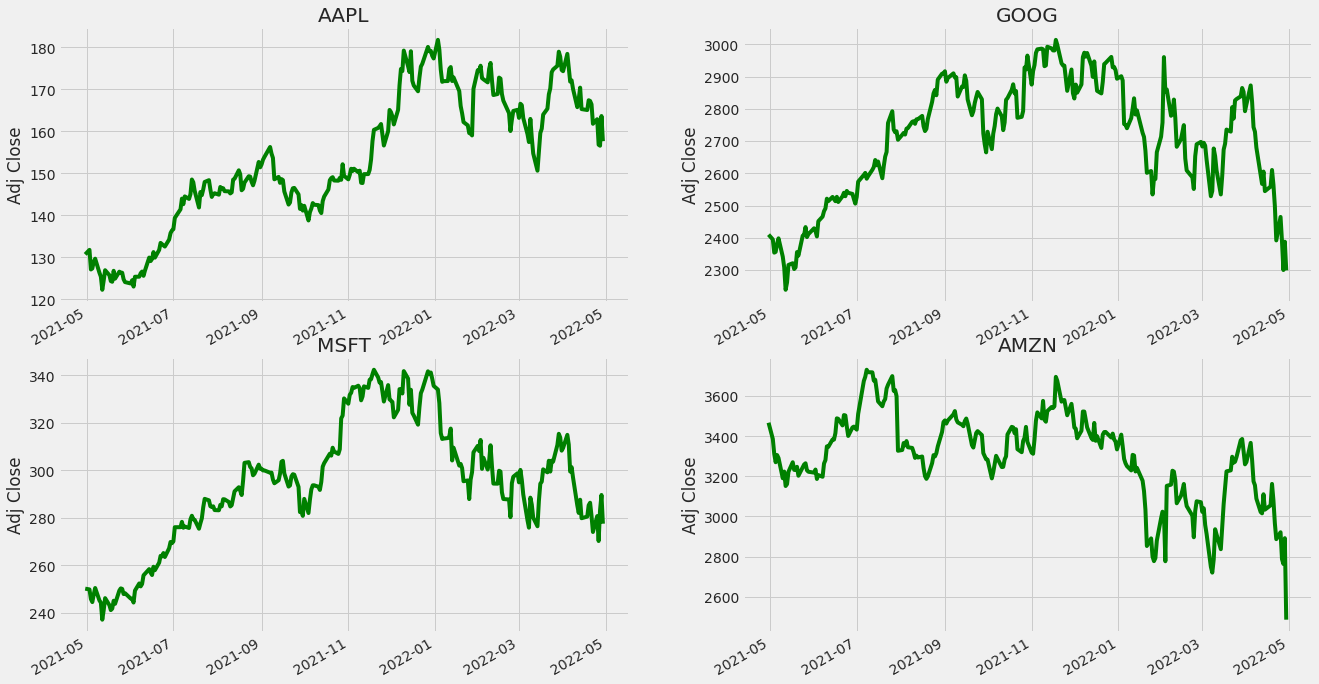

In [8]:
plt.figure(figsize=(20, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(color='g')
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")



It can be seen that `MSFT` follows `AAPL` quite accurately, and `GOOG` does so for `MSFT`. Therefore, these pairs can be
considered for pair trading.



We can investigate these pairs further by looking at the delay.



Thus, we can be quite sure that trading the former just like the first one taking into account the delay should give us
profit, granted our trading transactions are good in the first place.

## Daily stocks change

Volume plays a really important role when it comes to trading. In general, the more volume there is, the more violent
the changes in price. Stocks with low volume a day tend to be safer, but less profitable than the ones with high one.

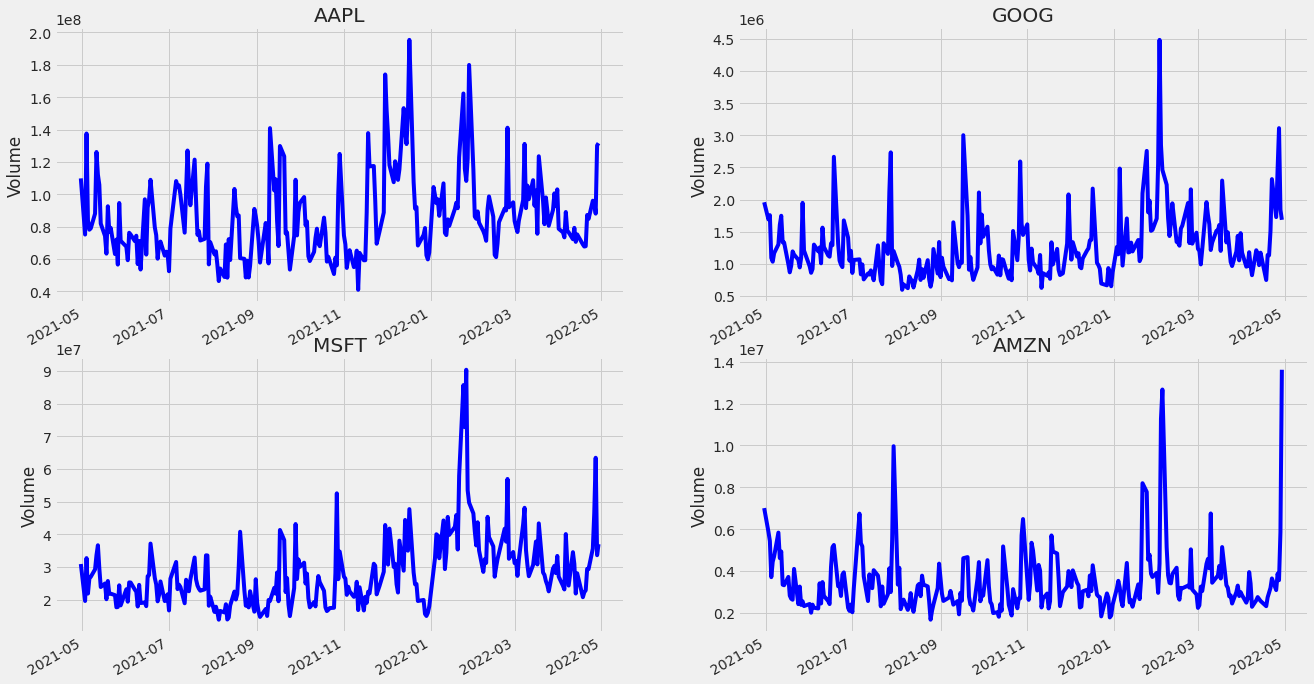

In [10]:
plt.figure(figsize=(20, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(color='b')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")



`GOOG` has the lowest volume, so it should be the safest choice out of the four.

`AAPL` has the highest volume and is expected to be potentially most profitable, but risky one.

It is worth noticing the general trend of the volume is very similar across all the stocks.

## Moving average

Moving average is an indicator used to identify the trend direction of a stock, or to determine its support and
resistance levels. It represents the best time to buy or sell, based on crossing of the so-called moving average 20 and
50. If they cross below the resistance level, that indicates the time to buy.

In [28]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()



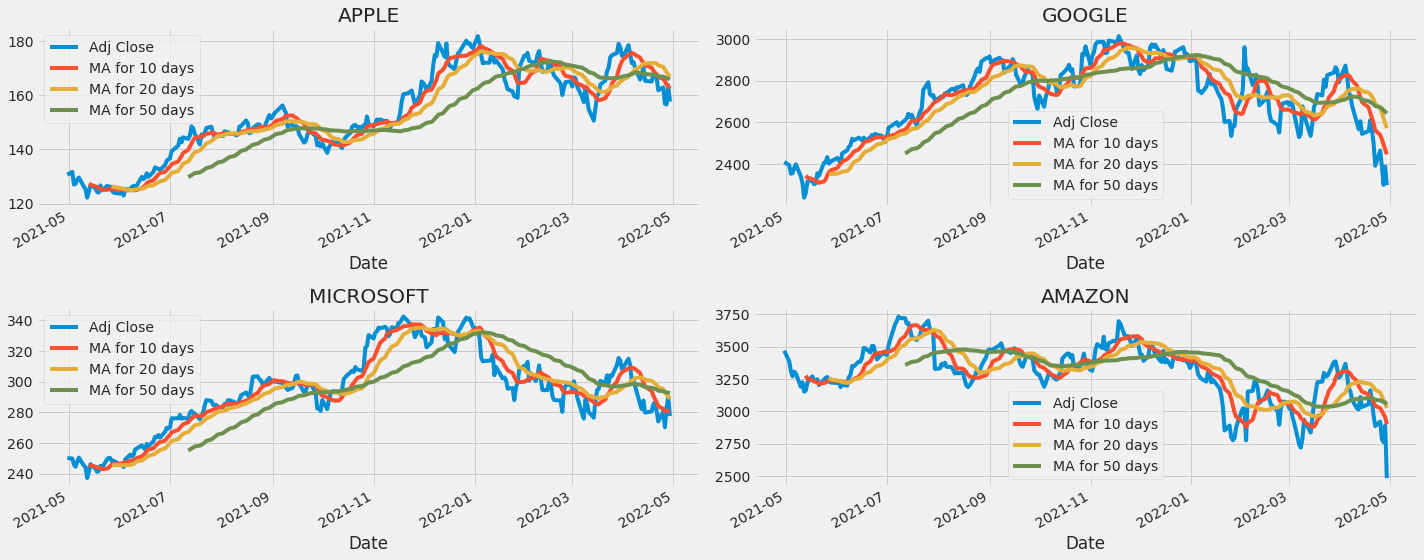

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(20)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## Daily average return


The daily return measures the dollar change in a stock's price as a percentage of the previous day's closing price. It
shows the more important and useful relative change, instead of the fixed difference value.

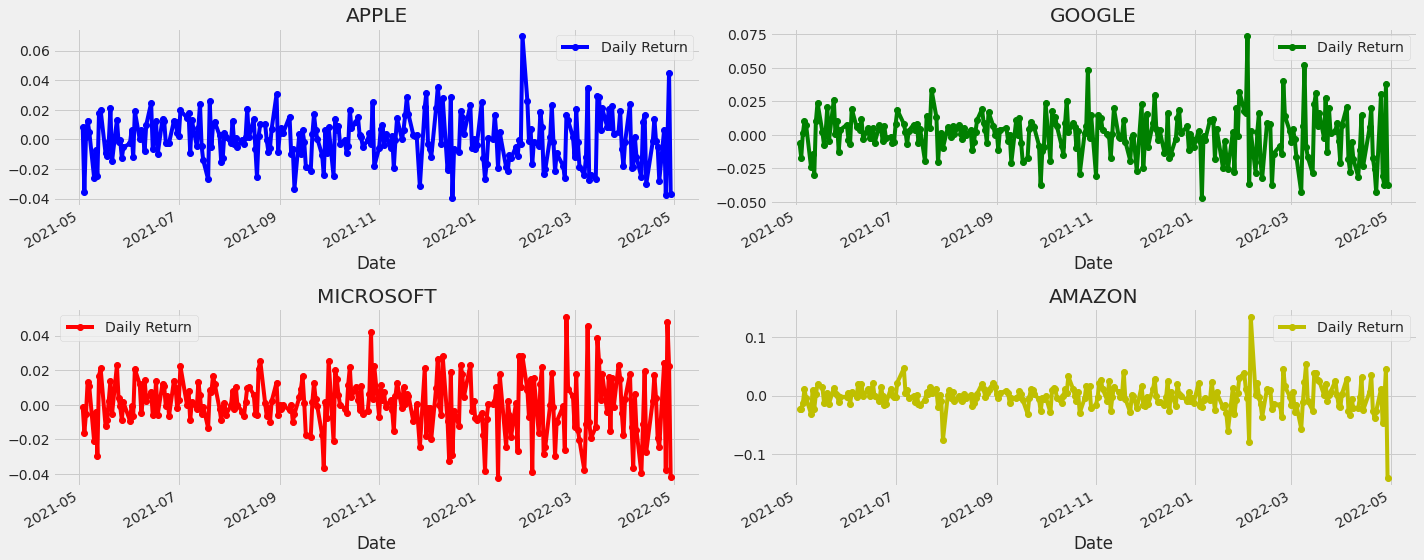

In [30]:
# Finding the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Plotting the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(20)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True,  marker='o',color='b')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True,  marker='o',color='g')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, marker='o',color='r')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True,  marker='o',color='y')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Daily return based on histogram clearly depicts the behaviour change of stocks in terms of resistance for over bought and sold.

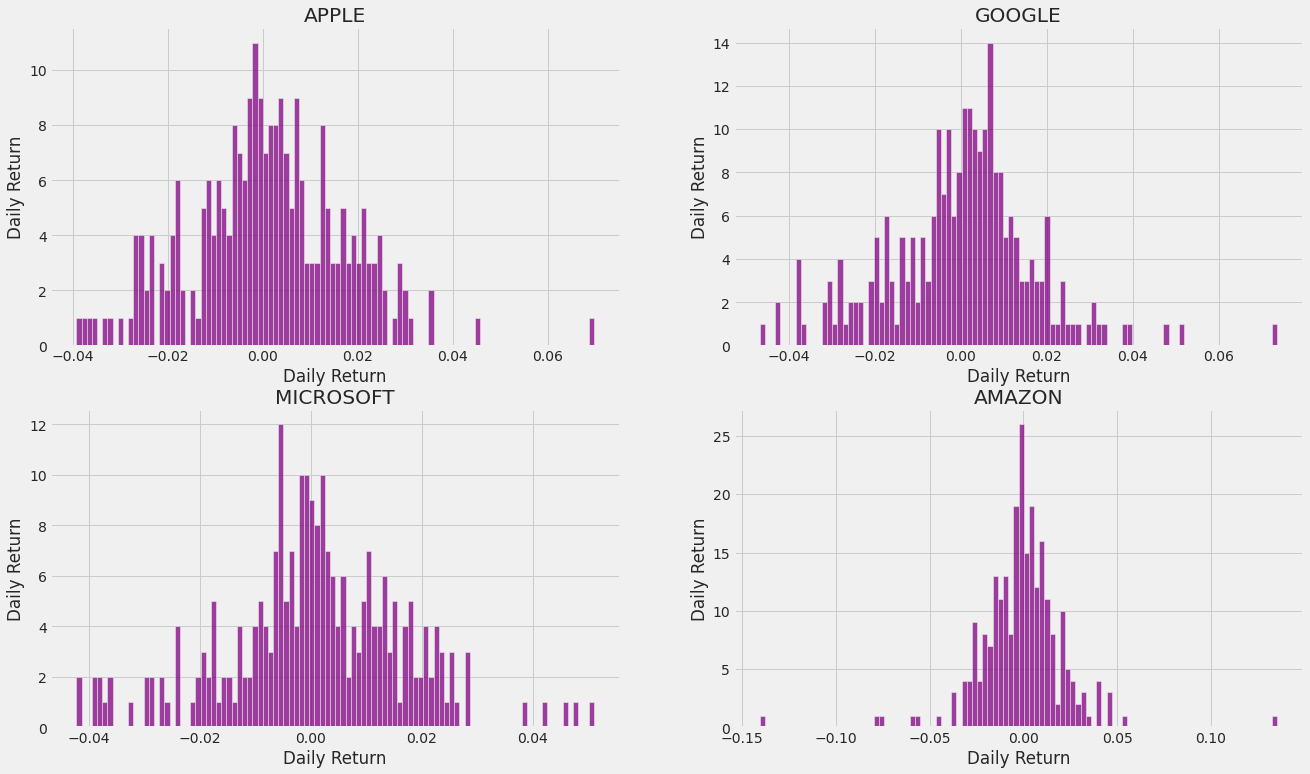

In [32]:
plt.figure(figsize=(20, 12))


for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.histplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

## Correlation

Correlation plays a very important role in terms of avoiding huge losses in terms of short period of time


The table down below a warm up to check the change in few days 

In [33]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-04-30,130.683289,2410.120117,250.142487,3467.419922
2021-05-03,131.756882,2395.169922,249.825058,3386.489990
2021-05-04,127.094612,2354.250000,245.787949,3311.870117
2021-05-05,127.343140,2356.739990,244.478622,3270.540039
2021-05-06,128.973450,2381.350098,247.712280,3306.370117


The following table shows the percentage change per day basis on closing price

In [34]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-04-30,NaN,NaN,NaN,NaN
2021-05-03,0.008215,-0.006203,-0.001269,-0.023340
2021-05-04,-0.035385,-0.017084,-0.016160,-0.022035
2021-05-05,0.001955,0.001058,-0.005327,-0.012479
2021-05-06,0.012802,0.010442,0.013227,0.010955


### Pairplot



Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

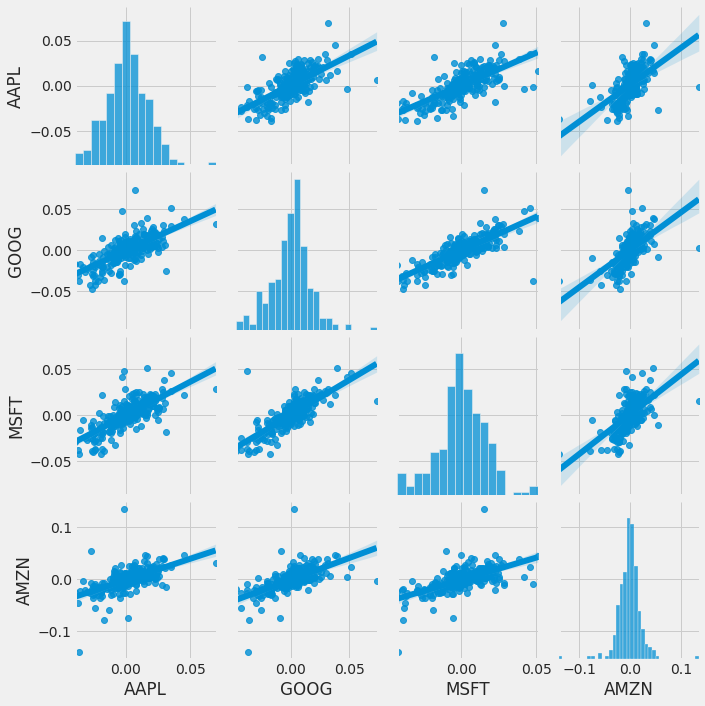

In [35]:
sns.pairplot(tech_rets, kind='reg')

### Return on risk factor

Now, we are going to compare each stock's return with the risk factor and cluster them together with other stocks.

While this plot alone can be useful in an analysis, we can find make it more valuable by coloring the figures based on a categorical variable such as continent.

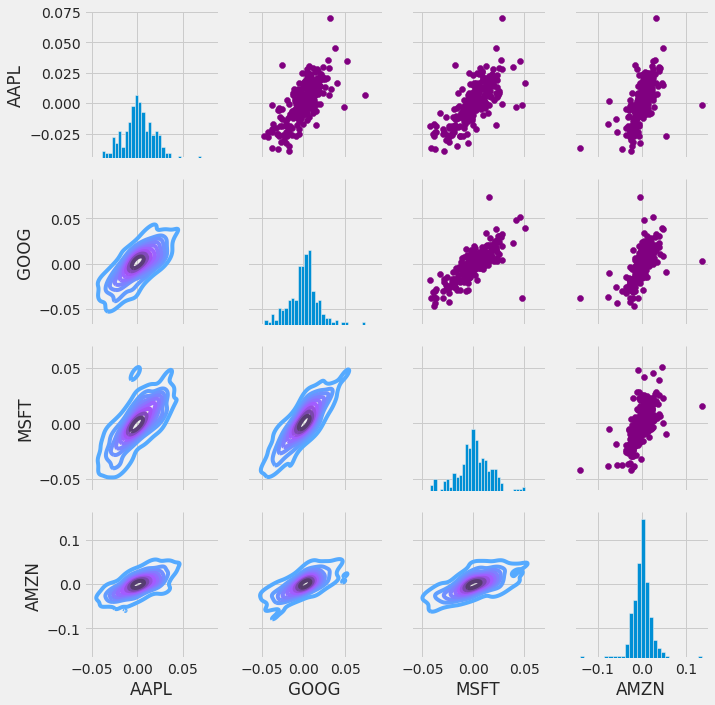

In [40]:


return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

Now we will try to vizulize the correlation between returns of the stocks

Text(0.5, 1.0, 'Correlation matrix based on return of stocks')

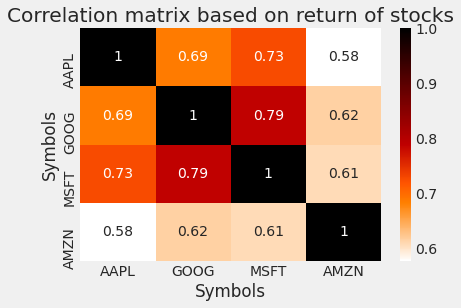

In [38]:

sns.heatmap(tech_rets.corr(), annot=True, cmap='gist_heat_r')
plt.title('Correlation matrix based on return of stocks')



We can clearly see that Apple and microsoft are highly correlated, so it's good to do pair trading rather than trading separately and wasting resources



Text(0.5, 1.0, 'Correlation matrix based on closing price')

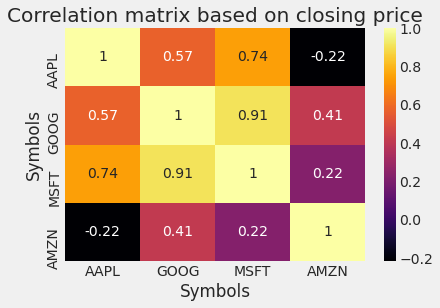

In [39]:

sns.heatmap(closing_df.corr(), annot=True, cmap='inferno')
plt.title('Correlation matrix based on closing price')

## Risk

Its important to calculate the risk before investing and also chossing the best return

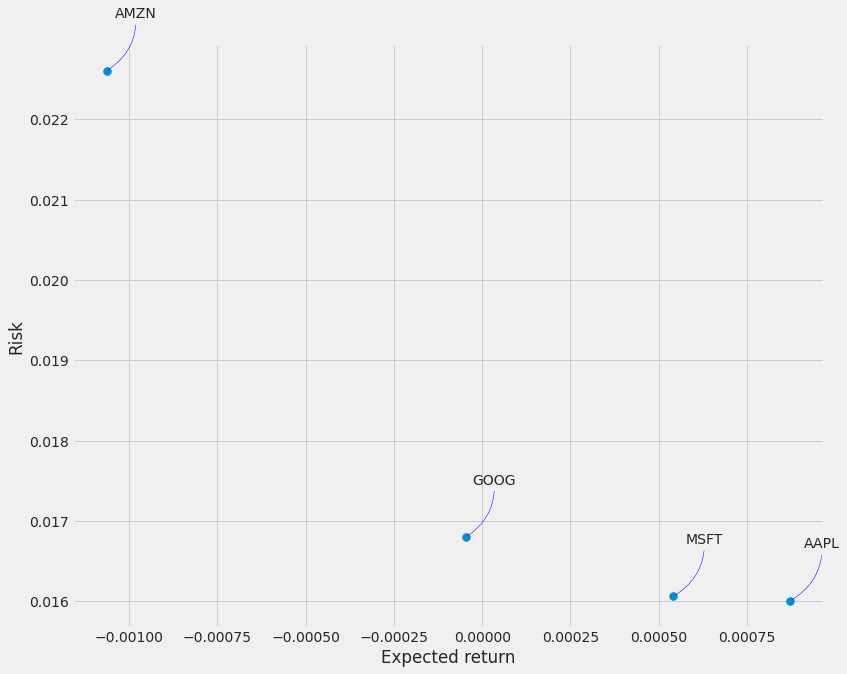

In [27]:
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))



We can clearly see that *Apple* is one of the secured the investment in terms of higher return and low risk

# Summary

TODO - give summary